# **IMPORTING STANDARD LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# **IMPORT THE DATA**

In [2]:
df = pd.read_csv('/content/Mobile_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [4]:
df.describe()

battery_power  clock_speed           fc   int_memory        m_dep  \
count    2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     1.522250     4.309500    32.046500     0.501750   
std       439.418206     0.816004     4.341444    18.145715     0.288416   
min       501.000000     0.500000     0.000000     2.000000     0.100000   
25%       851.750000     0.700000     1.000000    16.000000     0.200000   
50%      1226.000000     1.500000     3.000000    32.000000     0.500000   
75%      1615.250000     2.200000     7.000000    48.000000     0.800000   
max      1998.000000     3.000000    19.000000    64.000000     1.000000   

         mobile_wt      n_cores           pc    px_height     px_width  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    140.249000     4.520500     9.916500   645.108000  1251.515500   
std      35.399655     2.287837     6.064315   443.780811   432.199447   
min      80.000000     1.000000     0.000000     0.000000   500.000000   
25%     109.000000     3.000000     5.000000   282.750000   874.750000   
50%     141.000000     4.000000    10.000000   564.000000  1247.000000   
75%     170.000000     7.000000    15.000000   947.250000  1633.000000   
max     200.000000     8.000000    20.000000  1960.000000  1998.000000   

               ram         sc_h         sc_w    talk_time  price_range  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean   2124.213000    12.306500     5.767000    11.011000     1.500000  
std    1084.732044     4.213245     4.356398     5.463955     1.118314  
min     256.000000     5.000000     0.000000     2.000000     0.000000  
25%    1207.500000     9.000000     2.000000     6.000000     0.750000  
50%    2146.500000    12.000000     5.000000    11.000000     1.500000  
75%    3064.500000    16.000000     9.000000    16.000000     2.250000  
max    3998.000000    19.000000    18.000000    20.000000     3.000000

In [5]:
df.skew()

battery_power    0.031898
clock_speed      0.178084
fc               1.019811
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
price_range      0.000000
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x793ffe6baf80>,
 'caps': [<matplotlib.lines.Line2D at 0x793ffe6bb4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x793ffe6bace0>],
 'medians': [<matplotlib.lines.Line2D at 0x793ffe6bba00>],
 'fliers': [<matplotlib.lines.Line2D at 0x793ffe6bbca0>],
 'means': []}

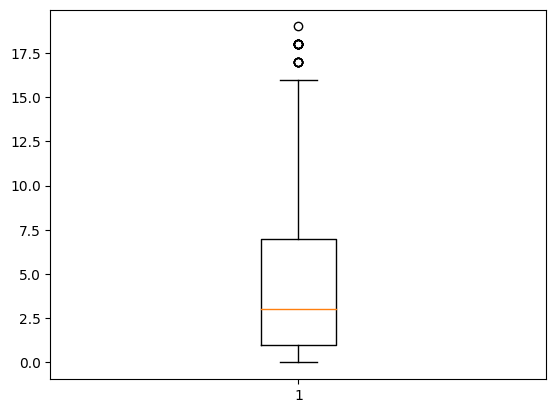

In [6]:
plt.boxplot(df['fc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x793ffc61f0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x793ffc61f610>,
 'boxes': [<matplotlib.lines.Line2D at 0x793ffc61c3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x793ffc61fb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x793ffc61fdf0>],
 'means': []}

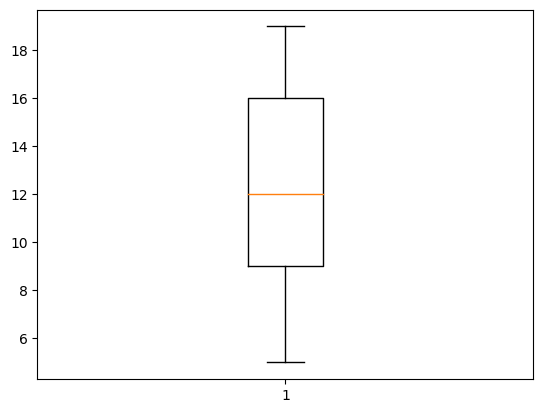

In [7]:
plt.boxplot(df['sc_h'])

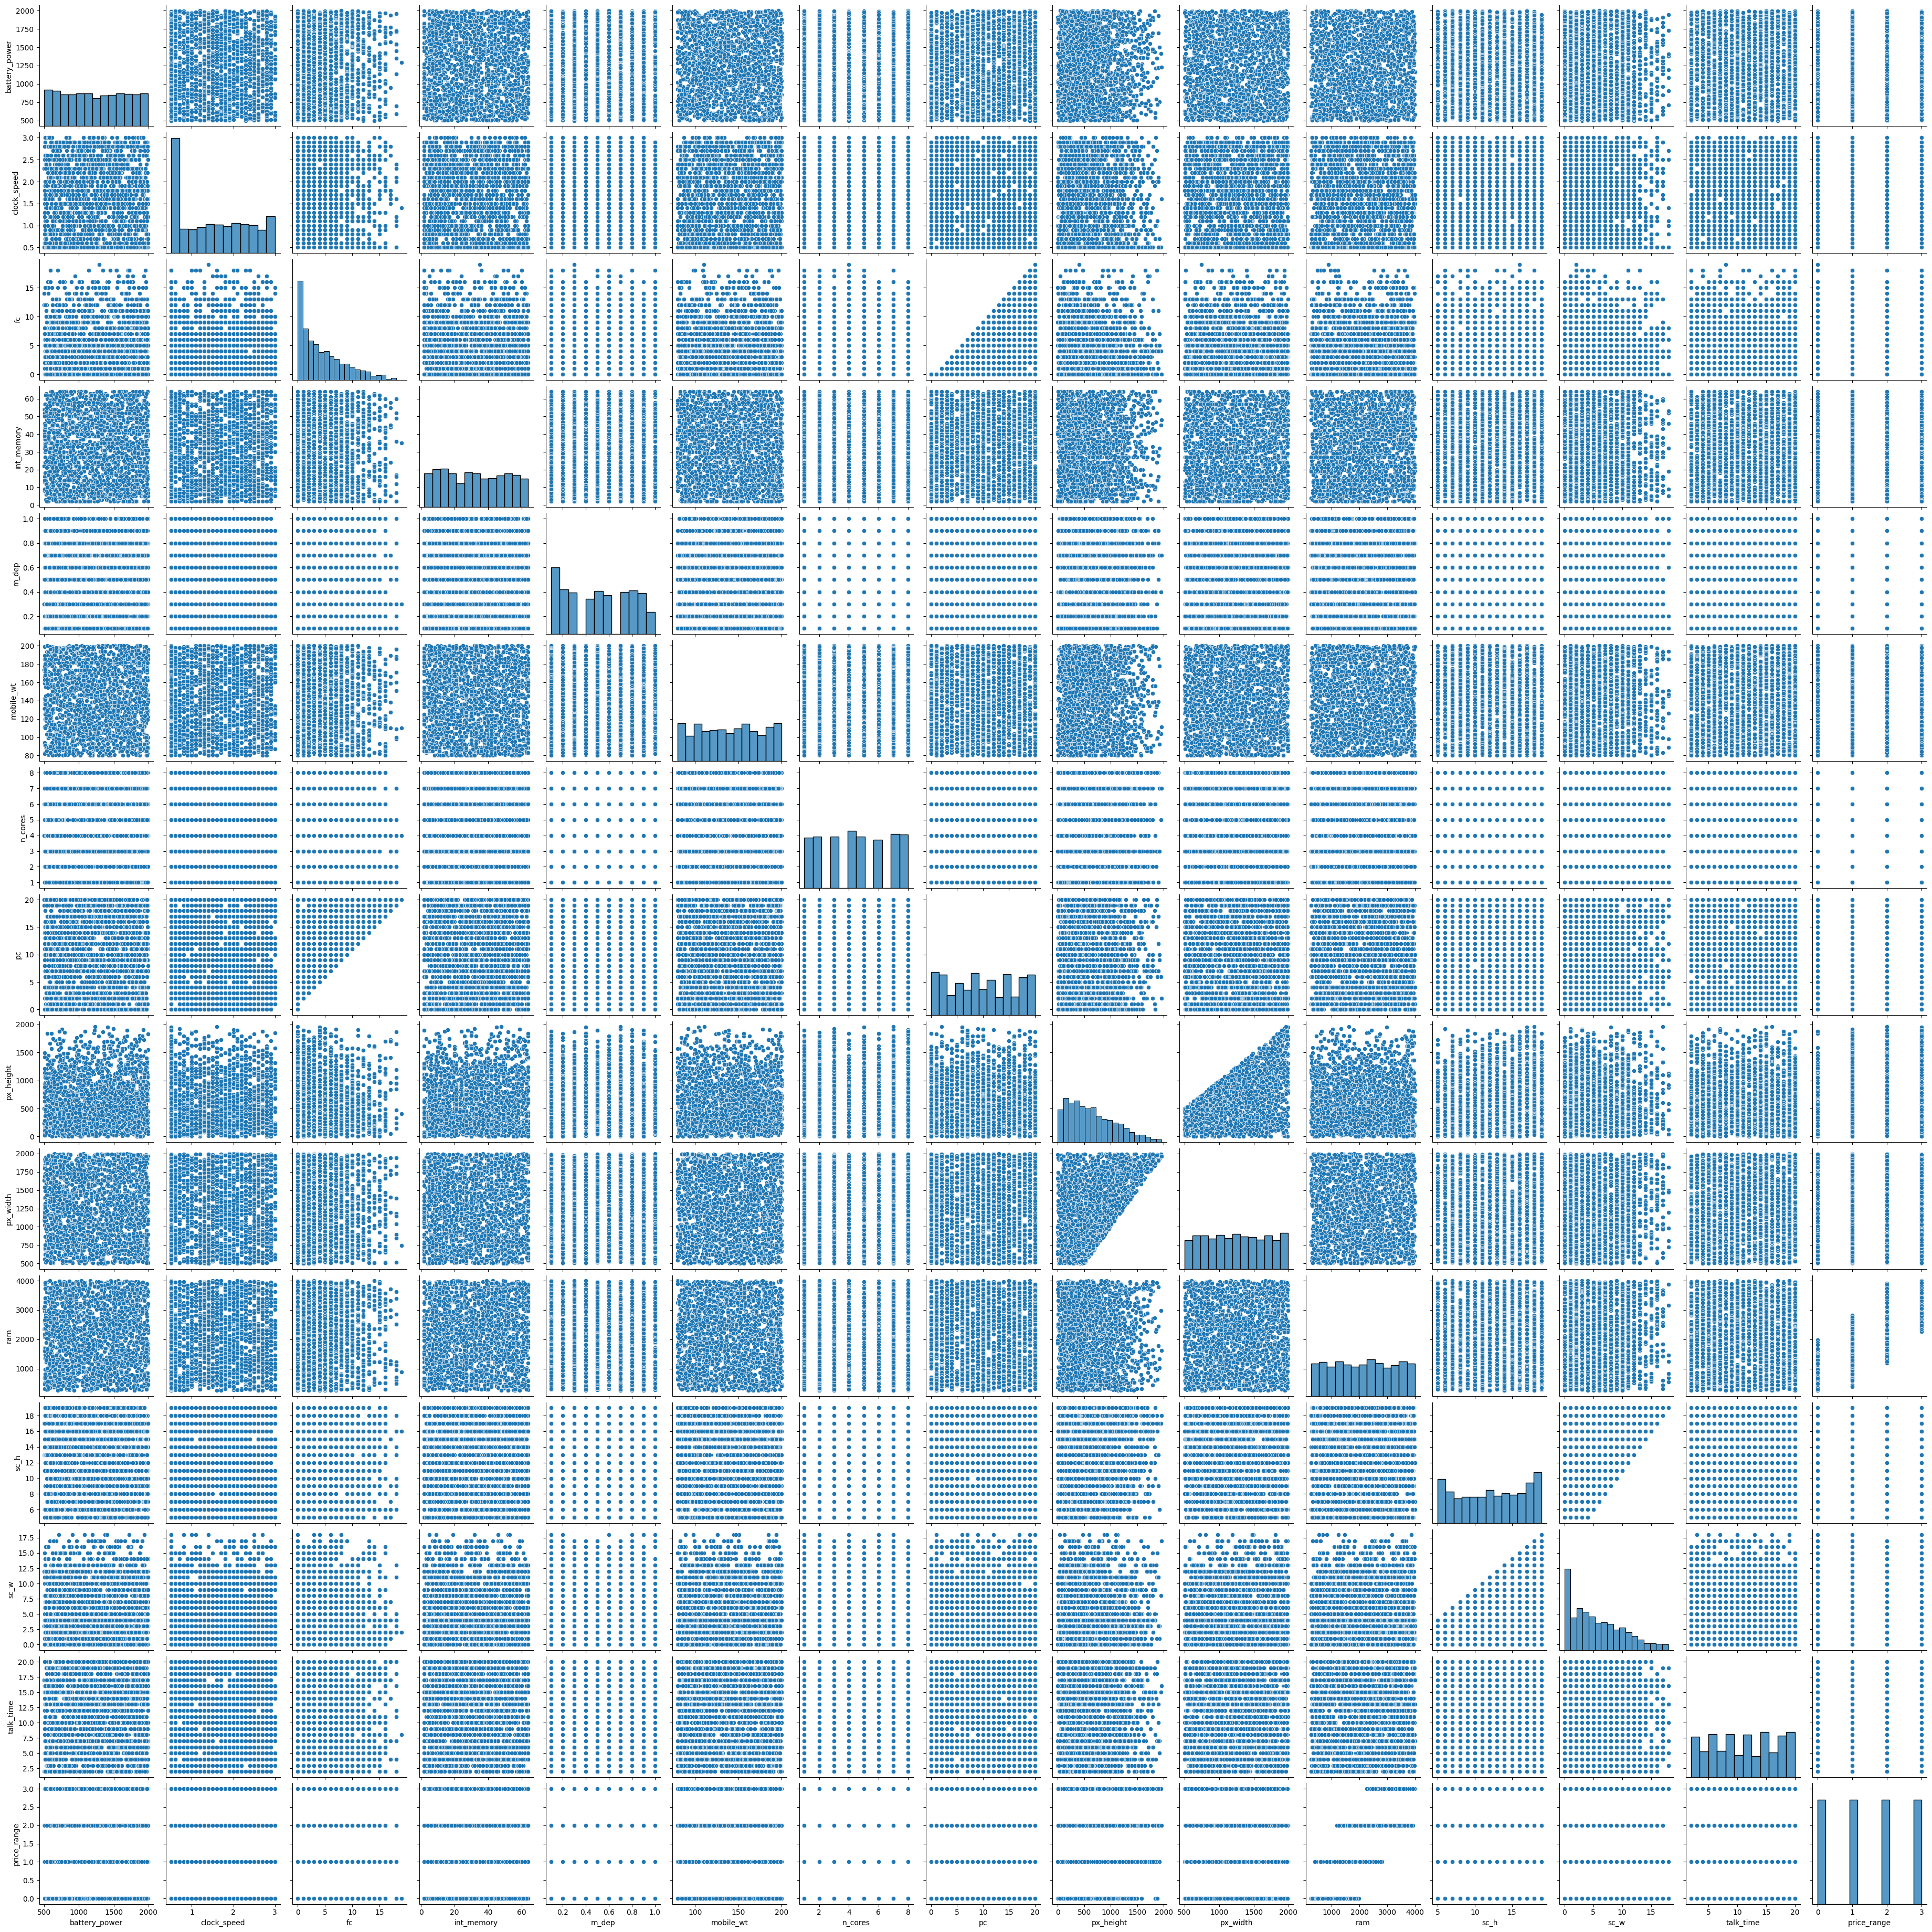

In [8]:
sns.pairplot(df)

<Axes: >

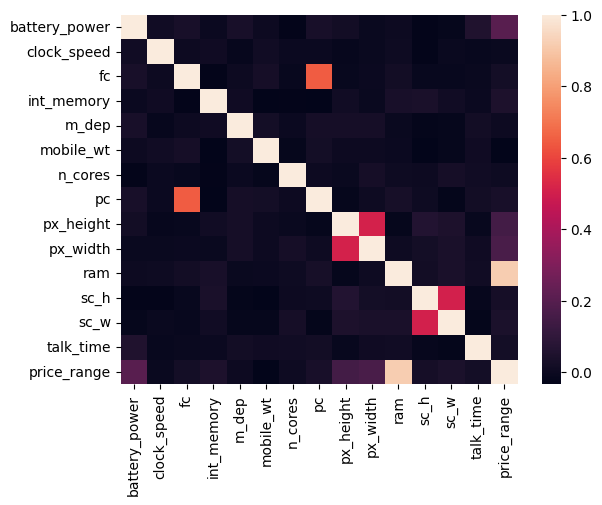

In [9]:
sns.heatmap(df.corr())

# **DIVIDE DATA INTO X AND Y**

In [10]:
x = df.iloc[:,:-1]
y = df['price_range']

In [11]:
print(x.shape)
print(y.shape)

(2000, 14)
(2000,)


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =123)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 14)
(400, 14)
(1600,)
(400,)


# **LOGISTIC REGRESSION**

In [14]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
preds_ytrain_lr = lr.predict(x_train)
preds_ytest_lr = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
print(y_train)

1264    1
722     1
210     2
252     1
297     1
       ..
1122    3
1346    3
1406    1
1389    0
1534    2
Name: price_range, Length: 1600, dtype: int64


In [16]:
print(x_train)

      battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  \
1264            676          2.2   1          39    0.2         84        1   
722            1156          0.5   6          61    0.1         89        7   
210            1395          1.8   0          23    0.1        111        3   
252             708          2.7   0          63    1.0        195        8   
297            1329          1.0   1          52    0.9        181        6   
...             ...          ...  ..         ...    ...        ...      ...   
1122           1871          2.1   4          41    0.4        144        8   
1346           1446          2.8   0          18    0.3        178        8   
1406           1731          2.3  18          60    0.5        171        4   
1389           1801          0.5   6          52    0.9        120        6   
1534            622          1.9  12          11    0.8        193        8   

      pc  px_height  px_width   ram  sc_h  sc_w  ta

In [17]:
print(preds_ytest_lr)

[1 3 3 3 3 3 1 1 0 1 0 1 2 0 1 3 0 3 1 1 1 1 0 3 2 2 2 1 3 1 0 1 0 1 3 3 2
 3 1 1 2 3 1 1 2 0 0 1 2 0 3 1 2 0 0 3 0 0 3 3 1 0 2 0 3 2 0 2 3 1 3 1 0 2
 1 2 0 1 0 0 0 0 2 2 2 1 2 0 0 2 3 3 2 3 3 0 0 0 0 3 1 1 3 3 3 1 3 1 3 3 3
 2 3 2 3 3 3 1 0 3 2 2 3 0 0 2 3 3 2 1 3 1 3 1 1 3 2 3 3 3 1 1 3 2 3 3 1 1
 1 0 1 3 1 0 2 3 3 1 0 0 2 0 1 3 0 1 0 1 2 1 1 2 1 0 1 0 2 1 3 1 3 3 3 0 3
 3 1 1 0 1 3 1 2 3 0 3 3 1 3 1 1 1 0 3 3 3 1 3 3 1 3 3 3 1 1 0 0 0 1 1 0 1
 1 1 3 1 3 1 3 1 0 3 3 2 2 3 2 3 1 0 0 3 3 2 1 2 2 3 3 3 0 1 2 3 1 3 3 0 3
 0 2 1 1 1 1 3 3 0 2 1 0 1 2 0 3 0 2 3 3 3 3 3 3 3 1 3 0 2 2 3 2 3 2 2 0 1
 3 1 3 0 1 1 3 1 3 2 3 0 2 2 0 1 0 2 1 3 3 0 3 2 1 0 3 3 1 1 3 1 2 0 1 2 3
 1 0 0 3 1 0 0 3 1 0 3 3 2 3 2 0 2 0 2 3 0 2 2 3 3 1 0 2 3 1 2 2 3 3 2 3 0
 0 1 3 1 2 1 3 1 3 2 1 0 0 3 1 1 1 1 1 0 0 3 3 3 3 1 2 0 1 0]


In [18]:
print(preds_ytrain_lr)

[3 2 3 ... 0 0 2]


In [19]:
def acc_report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  clas_rep = classification_report(actual,predicted)
  print('The Accuracy of the model is:',round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)

In [20]:
acc_report(y_train,preds_ytrain_lr)

The Accuracy of the model is: 0.64
[[332  76   5   0]
 [ 67 216  89  28]
 [  1  91 174 118]
 [  0   4  93 306]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       413
           1       0.56      0.54      0.55       400
           2       0.48      0.45      0.47       384
           3       0.68      0.76      0.72       403

    accuracy                           0.64      1600
   macro avg       0.64      0.64      0.64      1600
weighted avg       0.64      0.64      0.64      1600



In [21]:
acc_report(y_test,preds_ytest_lr)

The Accuracy of the model is: 0.64
[[65 22  0  0]
 [20 61 13  6]
 [ 0 29 44 43]
 [ 0  0 13 84]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76        87
           1       0.54      0.61      0.58       100
           2       0.63      0.38      0.47       116
           3       0.63      0.87      0.73        97

    accuracy                           0.64       400
   macro avg       0.64      0.65      0.63       400
weighted avg       0.64      0.64      0.62       400



# **RANDOM FOREST IMPLEMENTATION**

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(n_estimators = 20,max_depth = 3,verbose = 2)
rf.fit(x_train,y_train)

building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


RandomForestClassifier(max_depth=3, n_estimators=20, verbose=2)

In [24]:
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

In [25]:
acc_report(y_train,preds_rf_train)

The Accuracy of the model is: 0.82
[[401   9   0   3]
 [ 52 311  35   2]
 [  0  85 212  87]
 [  0   0  14 389]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       413
           1       0.77      0.78      0.77       400
           2       0.81      0.55      0.66       384
           3       0.81      0.97      0.88       403

    accuracy                           0.82      1600
   macro avg       0.82      0.82      0.81      1600
weighted avg       0.82      0.82      0.81      1600



In [26]:
acc_report(y_test,preds_rf_test)

The Accuracy of the model is: 0.79
[[87  0  0  0]
 [16 74  6  4]
 [ 0 28 63 25]
 [ 0  0  6 91]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.92        87
           1       0.73      0.74      0.73       100
           2       0.84      0.54      0.66       116
           3       0.76      0.94      0.84        97

    accuracy                           0.79       400
   macro avg       0.79      0.81      0.79       400
weighted avg       0.79      0.79      0.78       400



# **GRADIENT BOOSTING ALGORITHM**

In [27]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
preds_gb_train = gb.predict(x_train)
preds_gb_test = gb.predict(x_test)

In [28]:
acc_report(y_train,preds_gb_train)

The Accuracy of the model is: 1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 383   1]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [29]:
acc_report(y_test,preds_gb_test)

The Accuracy of the model is: 0.9
[[84  3  0  0]
 [ 7 89  4  0]
 [ 0  9 98  9]
 [ 0  0  7 90]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        87
           1       0.88      0.89      0.89       100
           2       0.90      0.84      0.87       116
           3       0.91      0.93      0.92        97

    accuracy                           0.90       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.90      0.90      0.90       400



# **implementation of ADA boost**

In [30]:
ada = AdaBoostClassifier(n_estimators = 200)
ada.fit(x_train,y_train)
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)

In [31]:
def model_eval(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  clas_rep = classification_report(actual,predicted)
  print('The Accuracy of the model is:',round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)

In [32]:
model_eval(y_train,preds_ada_train)

The Accuracy of the model is: 0.81
[[333  80   0   0]
 [ 40 339  21   0]
 [  0  38 299  47]
 [  0   0  72 331]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       413
           1       0.74      0.85      0.79       400
           2       0.76      0.78      0.77       384
           3       0.88      0.82      0.85       403

    accuracy                           0.81      1600
   macro avg       0.82      0.81      0.81      1600
weighted avg       0.82      0.81      0.81      1600



In [33]:
model_eval(y_test,preds_ada_test)

The Accuracy of the model is: 0.77
[[63 24  0  0]
 [18 79  3  0]
 [ 0 12 89 15]
 [ 0  0 19 78]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        87
           1       0.69      0.79      0.73       100
           2       0.80      0.77      0.78       116
           3       0.84      0.80      0.82        97

    accuracy                           0.77       400
   macro avg       0.78      0.77      0.77       400
weighted avg       0.78      0.77      0.77       400



In [34]:
np.sqrt(2000)

44.721359549995796

**KNN IMPLEMENTATION**

---



In [35]:
knn = KNeighborsClassifier(n_neighbors = 35)

In [36]:
knn.fit(x_train,y_train)
preds_knn_train = knn.predict(x_train)
preds_knn_test = knn.predict(x_test)

In [37]:
def model_eval(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  clas_rep = classification_report(actual,predicted)
  print('The Accuracy of the model is:',round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)

In [38]:
model_eval(y_train,preds_knn_train)

The Accuracy of the model is: 0.94
[[406   7   0   0]
 [ 14 371  15   0]
 [  0  25 337  22]
 [  0   0  15 388]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       413
           1       0.92      0.93      0.92       400
           2       0.92      0.88      0.90       384
           3       0.95      0.96      0.95       403

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600



In [39]:
model_eval(y_test,preds_knn_test)

The Accuracy of the model is: 0.92
[[ 86   1   0   0]
 [  7  90   3   0]
 [  0   8 102   6]
 [  0   0   5  92]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        87
           1       0.91      0.90      0.90       100
           2       0.93      0.88      0.90       116
           3       0.94      0.95      0.94        97

    accuracy                           0.93       400
   macro avg       0.92      0.93      0.93       400
weighted avg       0.92      0.93      0.92       400



# **XG BOOST IMPLEMENTATION**

In [47]:
import xgboost as xgb

In [48]:
d_train=xgb.DMatrix(x_train,y_train)
d_test=xgb.DMatrix(x_test,y_test)

In [49]:
xgb_classifier=xgb.XGBClassifier(n_estimators=100,tree_method='hist')

In [50]:
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [51]:
y_pred_xgb_train=xgb_classifier.predict(x_train)
y_pred_xgb_test=xgb_classifier.predict(x_test)

In [52]:
acc_report(y_train,y_pred_xgb_train)
acc_report(y_test,y_pred_xgb_test)

The Accuracy of the model is: 1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 384   0]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

The Accuracy of the model is: 0.92
[[ 85   2   0   0]
 [  5  91   4   0]
 [  0   8 100   8]
 [  0   0   7  90]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        87
           1       0.90      0.91      0.91       100
           2       0.90      0.86      0.88       116
           3       0.92      0.93      0.92        97

    accuracy                           0.92       400
   macro avg    

In [53]:
from sklearn.svm import SVC

In [54]:
svc = SVC(kernel = 'poly',degree = 4)
svc.fit(x_train,y_train)
preds_svm_train= svc.predict(x_train)
preds_svm_test = svc.predict(x_test)

In [55]:
def model_eval(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  clas_rep = classification_report(actual,predicted)
  print('The Accuracy of the model is:',round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)

In [56]:
model_eval(y_train,preds_svm_train)
model_eval(y_test,preds_svm_test)

The Accuracy of the model is: 0.97
[[413   0   0   0]
 [ 14 379   7   0]
 [  0  10 362  12]
 [  0   0  12 391]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       413
           1       0.97      0.95      0.96       400
           2       0.95      0.94      0.95       384
           3       0.97      0.97      0.97       403

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600

The Accuracy of the model is: 0.94
[[ 87   0   0   0]
 [  9  89   2   0]
 [  0   4 107   5]
 [  0   0   4  93]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        87
           1       0.96      0.89      0.92       100
           2       0.95      0.92      0.93       116
           3       0.95      0.96      0.95        97

    accuracy                           0.94       400
   macro avg   

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
gb = GaussianNB()
gb.fit(x_train , y_train)

GaussianNB()

In [59]:
preds_gb_train= gb.predict(x_train)
preds_gb_test = gb.predict(x_test)

In [60]:
model_eval(y_train,preds_gb_train)

The Accuracy of the model is: 0.82
[[372  41   0   0]
 [ 30 293  77   0]
 [  0  65 281  38]
 [  0   1  42 360]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       413
           1       0.73      0.73      0.73       400
           2       0.70      0.73      0.72       384
           3       0.90      0.89      0.90       403

    accuracy                           0.82      1600
   macro avg       0.82      0.81      0.82      1600
weighted avg       0.82      0.82      0.82      1600



In [61]:
model_eval(y_test,preds_gb_test)

The Accuracy of the model is: 0.82
[[82  5  0  0]
 [ 8 78 14  0]
 [ 0 22 81 13]
 [ 0  0  9 88]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        87
           1       0.74      0.78      0.76       100
           2       0.78      0.70      0.74       116
           3       0.87      0.91      0.89        97

    accuracy                           0.82       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.82      0.82      0.82       400

